In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Data/Training.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data/Testing.csv")
A=train_data
B=test_data

In [ ]:
A.head()

In [ ]:
B.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
A.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [ ]:
B.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
A = A.drop(["Unnamed: 133"],axis=1)

In [ ]:
A.prognosis.value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

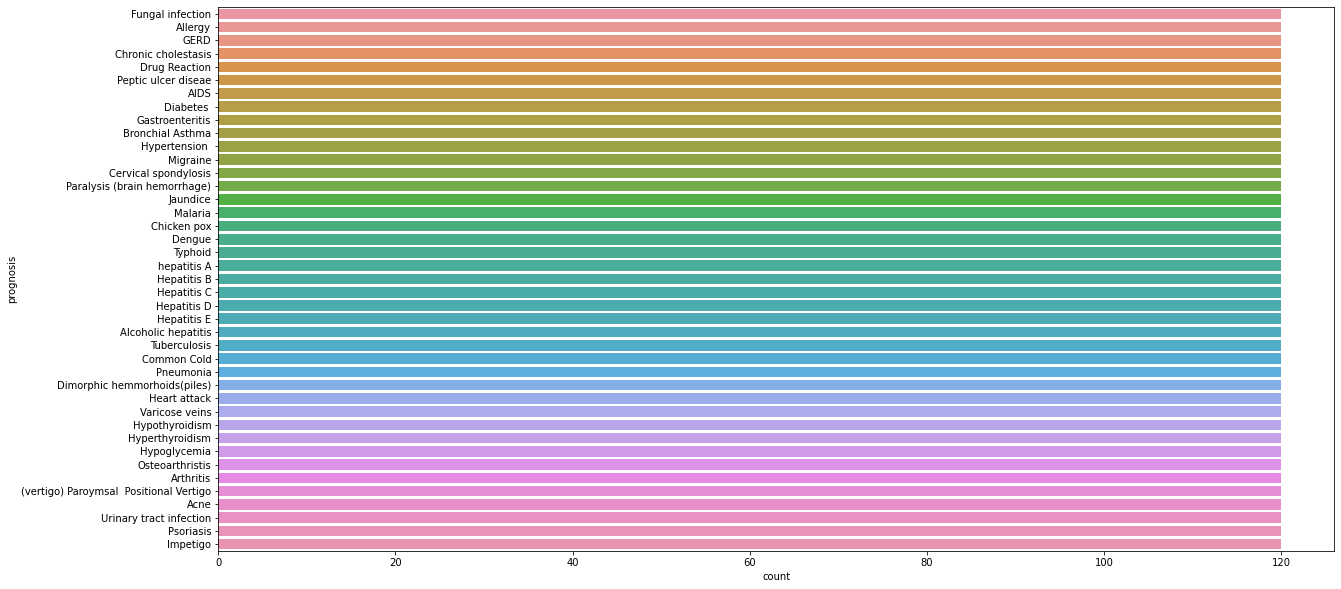

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(y=train_data['prognosis'])
plt.show()

In [ ]:
A.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
B.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
#Define X and Y - from training data and P for testing data
Y = A[["prognosis"]]
X = A.drop(["prognosis"],axis=1)
P = B.drop(["prognosis"],axis=1)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
#model1-decision tree
dtc= DecisionTreeClassifier(random_state=42)
model_dtc = dtc.fit(xtrain,ytrain)
tr_pred_dtc = model_dtc.predict(xtrain)
ts_pred_dtc = model_dtc.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,tr_pred_dtc))
print("testing accuracy is:",accuracy_score(ytest,ts_pred_dtc))

training accuracy is: 1.0
testing accuracy is: 1.0


In [ ]:
#model2-random_forrest classifier
rfc= RandomForestClassifier(random_state=42)
model_rfc = rfc.fit(xtrain,ytrain)
tr_pred_rfc = model_rfc.predict(xtrain)
ts_pred_rfc = model_rfc.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,tr_pred_rfc))
print("testing accuracy is:",accuracy_score(ytest,ts_pred_rfc))

training accuracy is: 1.0
testing accuracy is: 1.0


In [ ]:
#applying random forrest on testing data to predict
test_data.join(pd.DataFrame(model_dtc.predict(P),columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma
